4 3
0 1
1 2
2 3
3


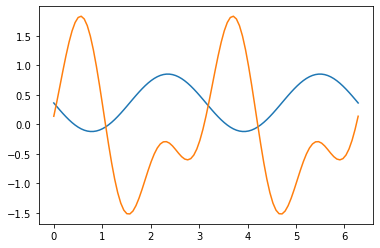

In [8]:
import tensorcircuit as tc
import numpy as np
from matplotlib import pyplot as plt
K = tc.set_backend('tensorflow')

edges = []

n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])

p = int(input())

# n,m=4,3
# edges.append((0,1));
# edges.append((1,2));
# edges.append((2,3));
# edges.append((3,0));
# p=4;

def u_beta(c, beta):
    for i in range(n):
        c.rx(i, theta = beta)

def u_gamma(c, gamma):
    for e in edges:
        x, y = e
        c.rzz(x, y, theta = gamma)

betas = [ 1. for _ in range(p) ]
gammas = [ 1. for _ in range(p) ]

def loss_cell(params):
    betas, gammas = params[:p],params[p:]
    c = tc.Circuit(n);
    for i in range(n):
        c.h(i)
    for i in range(p):
        u_gamma(c, gammas[i])
        u_beta(c, betas[i])
    return c

def loss(params):
    c = loss_cell(params)
    Loss = K.real(0.);
    for e in edges:
        Loss += K.real(c.expectation_ps(z = [e[0], e[1]]))
    return Loss

def loss1(a):
    betas[2]=a
    return loss(betas+gammas)

def loss2(a):
    gammas[0]=a
    return loss(betas+gammas)


def draw_function(f,s,t,point_num):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)

c=loss_cell(betas + gammas)

draw_function(loss1,0,2*np.pi,100)
draw_function(loss2,0,2*np.pi,100)